1.Название работы:
2.Цель:Познакомиться со средствами генерации и визуализации простых сигналов.
3.Постановка задачи:промоделировать синусоидальный и прямоугольный сигналы с раз-
личными параметрами. Получить их спектры. Вывести на график.
4.Теоритический раздел
5.Ход работы: 

sinus_signal 
    :return: ampl * sin(freeq * t) + ampl * sin(2 * freeq * t)
    
rectangle_signal 
    :return: ampl * signal.square(2 * np.pi * freq * t)
    
triangular_signal 
    :return: ampl * signal.sawtooth(2 * np.pi * freq * t)
    
plot_graphic 
    just my function for comfortable plotting
    


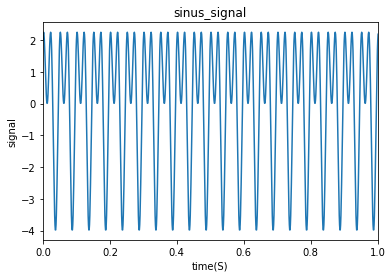

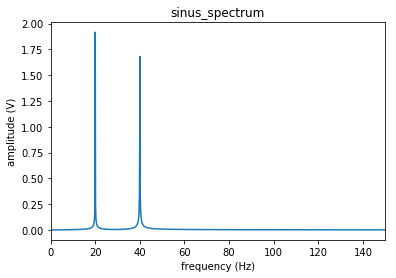

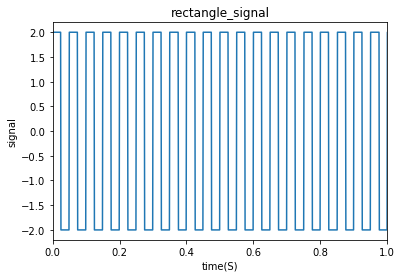

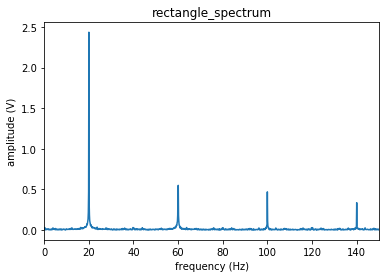

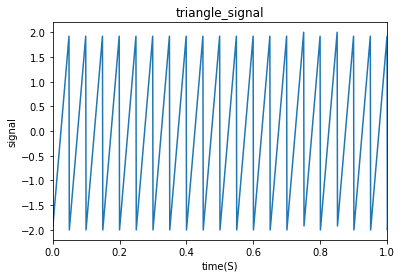

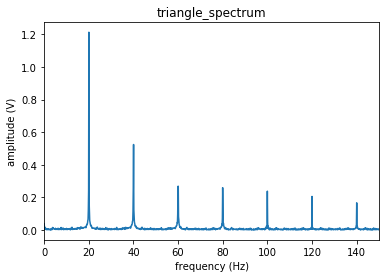

6.Выводы
	-график sinus_spectrum демонстрирует, что исходный гармонический сигнал является суммой
		2-ух гармонических сигналов с частотами 20 и 40 Hz.
	-график rectangle_spectrum демонстрирует, что исходный прямоугольный сигнал является суммой
		большого количества гармонических сигналов с разными частотами.
	-график triangular_spectrum - анологично предыдущему


In [4]:
from __future__ import print_function

print("1.Название работы:\n\
2.Цель:Познакомиться со средствами генерации и визуализации простых сигналов.\n\
3.Постановка задачи:промоделировать синусоидальный и прямоугольный сигналы с раз-\n\
личными параметрами. Получить их спектры. Вывести на график.\n\
4.Теоритический раздел\n\
5.Ход работы: \n")

import matplotlib.pyplot as plt
import numpy as np
 
from Lab_1 import get_sin_sig,get_rect_sig,get_triang_sig, plot_graphic
        
        
        

print("sinus_signal %s" % get_sin_sig.__doc__)
print("rectangle_signal %s"%get_rect_sig.__doc__)
print("triangular_signal %s"%get_triang_sig.__doc__)
print("plot_graphic %s"%plot_graphic.__doc__)



# Parameters of signals
sig_freq = 20  # frequency of original signal
ampl = 2  # amplitude of original signal
fs = 1000  # sampling rate
ts = 1.0 / fs  # sampling interval
n = 1 << 13  # number of fft points, pick power of 2

t = np.arange(0, n * ts, step=ts)  # time vector
signals = \
    [
        get_sin_sig(t, sig_freq, ampl),
        get_rect_sig(t, sig_freq, ampl),
        get_triang_sig(t, sig_freq, ampl)
    ]

# Parameters for graphics
functions_names = ['sinus_', 'rectangle_', 'triangle_']
show = True
save = not show

# Spectrum calculating and plotting
for sig, title in zip(signals, functions_names):
    fft_freq = np.fft.fftfreq(n, ts)  # discrete Fourier Transform frequencies

    sig_fft = np.fft.fft(sig) / n * 2  # discrete Fourier Transform ( / n * 2 - normalization)

    # [:(n - 1) / 2], because second half it's mirror image of first half
    plot_graphic(
        x=t[:(n - 1) / 2], y=sig[:(n - 1) / 2],
        title=title + 'signal',
        x_label='time(S)', y_label='signal',
        xlim=[0, 1],
        show=show, save=save
    )

    plot_graphic(
        x=fft_freq[:(n - 1) / 2], y=abs(sig_fft)[:(n - 1) / 2],
        title=title + 'spectrum',
        x_label='frequency (Hz)', y_label='amplitude (V)',
        xlim=[0, 150],
        show=show, save=save
    )

    
    
    
    

print("6.Выводы\n\
\t-график sinus_spectrum демонстрирует, что исходный гармонический сигнал является суммой\n\
\t\t2-ух гармонических сигналов с частотами 20 и 40 Hz.\n\
\t-график rectangle_spectrum демонстрирует, что исходный прямоугольный сигнал является суммой\n\
\t\tбольшого количества гармонических сигналов с разными частотами.\n\
\t-график triangular_spectrum - анологично предыдущему")
